# Лабораторна робота 5
### Студента групи МІТ-31 (підгрупа 2)
### Шило Івана Костянтиновича
## Завдання
1. Виконати вирішення задач регресії та класифікації для наборів даних, що використовувалися в лабораторних роботах 2,3 з використанням Tensorflow & NN
2. Отримані результати викласти на github у репозиторій ml2021 в основну (default) гілку в папці Lab5.

In [2]:
%pip install tensorflow

     |████████████████████████████████| 458.3 MB 38 kB/s /s eta 0:00:01             | 137.4 MB 2.9 MB/s eta 0:01:50��█████▎                 | 204.8 MB 3.8 MB/s eta 0:01:08███▉                 | 212.3 MB 3.8 MB/s eta 0:01:06 118.5 MB/s eta 0:00:02████▋         | 323.7 MB 118.5 MB/s eta 0:00:02
     |████████████████████████████████| 1.3 MB 69.0 MB/s eta 0:00:01
     |████████████████████████████████| 4.0 MB 51.0 MB/s eta 0:00:01
     |████████████████████████████████| 131 kB 72.0 MB/s eta 0:00:01
     |████████████████████████████████| 3.9 MB 49.1 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 7.9 MB/s  eta 0:00:01
     |████████████████████████████████| 42 kB 2.2 MB/s  eta 0:00:01
     |████████████████████████████████| 65 kB 7.2 MB/s  eta 0:00:01
     |████████████████████████████████| 462 kB 47.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.1 MB 62.2 MB/s eta 0:00:01
     |████████████████████████████████| 5.8 MB 57.2 MB/s eta 0:00:01
     |█████████████

      Successfully uninstalled six-1.16.0
Note: you may need to restart the kernel to use updated packages.


In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.losses import mae, mse

In [4]:
model = pd.read_csv("./drinks.csv")
model.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


In [5]:
insurance=model.drop("country",axis=1)

insurance.head(3)

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0,0,0,0.0
1,89,132,54,4.9
2,25,0,14,0.7


In [6]:
insurance = insurance.replace(np.nan, 0)
insurance = insurance.astype({"beer_servings": "int64"})
insurance = insurance.astype({"spirit_servings": "int64"})
insurance = insurance.astype({"wine_servings": "int64"})
insurance = insurance.astype({"total_litres_of_pure_alcohol": "int64"})

insurance.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0,0,0,0
1,89,132,54,4
2,25,0,14,0
3,245,138,312,12
4,217,57,45,5


In [7]:
insurance=pd.get_dummies(insurance)

insurance.head(3)

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0,0,0,0
1,89,132,54,4
2,25,0,14,0


In [8]:
X=insurance.drop("total_litres_of_pure_alcohol", axis=1)
y=insurance["total_litres_of_pure_alcohol"]

X.head(), y.head()

(   beer_servings  spirit_servings  wine_servings
 0              0                0              0
 1             89              132             54
 2             25                0             14
 3            245              138            312
 4            217               57             45,
 0     0
 1     4
 2     0
 3    12
 4     5
 Name: total_litres_of_pure_alcohol, dtype: int64)

In [9]:

from sklearn.model_selection import train_test_split 
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=48)


tf.random.set_seed=13

ins_model = tf.keras.Sequential([ 
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

ins_model.compile(
    loss='mse',
    optimizer=Adam(),
    metrics=['mse']
)

X_train.shape

(154, 3)

In [10]:
ins_history = ins_model.fit(X_train,y_train,epochs=10)

Epoch 1/10
5/5 [==============================] - 0s 2ms/step - loss: 5804.5894 - mse: 5804.5894
Epoch 2/10
5/5 [==============================] - 0s 2ms/step - loss: 4783.4521 - mse: 4783.4521
Epoch 3/10
5/5 [==============================] - 0s 1ms/step - loss: 3918.1060 - mse: 3918.1060
Epoch 4/10
5/5 [==============================] - 0s 2ms/step - loss: 3183.6306 - mse: 3183.6306
Epoch 5/10
5/5 [==============================] - 0s 2ms/step - loss: 2576.7927 - mse: 2576.7927
Epoch 6/10
5/5 [==============================] - 0s 2ms/step - loss: 2125.9229 - mse: 2125.9229
Epoch 7/10
5/5 [==============================] - 0s 11ms/step - loss: 1739.7786 - mse: 1739.7786
Epoch 8/10
5/5 [==============================] - 0s 3ms/step - loss: 1473.3164 - mse: 1473.3164
Epoch 9/10
5/5 [==============================] - 0s 2ms/step - loss: 1258.9318 - mse: 1258.9318
Epoch 10/10
5/5 [==============================] - 0s 2ms/step - loss: 1103.7635 - mse: 1103.7635


In [11]:
ins_history2 = ins_model.fit(X_train,y_train,epochs=200, verbose=0)

score1=ins_model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 3ms/step - loss: 1.3992 - mse: 1.3992


In [12]:
ins_model.save("i_mod.h5")

ins_model_loaded=tf.keras.models.load_model("i_mod.h5")


y1=ins_model.predict(X_test)
y2=ins_model_loaded.predict(X_test)

(y1-y2).sum()

X_train.head()

,beer_servings,spirit_servings,wine_servings
115,47,18,5
180,206,237,45
111,0,0,0
164,90,2,2
39,76,1,9


In [13]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

insurance2 = insurance.replace(np.nan, 0)
insurance2 = insurance2.astype({"beer_servings": "int64"})
insurance2 = insurance2.astype({"spirit_servings": "int64"})
insurance2 = insurance2.astype({"wine_servings": "int64"})
insurance2 = insurance2.astype({"total_litres_of_pure_alcohol": "int64"})
insurance2.head()

,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,0,0,0,0
1,89,132,54,4
2,25,0,14,0
3,245,138,312,12
4,217,57,45,5


X=insurance2.drop("total_litres_of_pure_alcohol", axis=1)
y=insurance2["total_litres_of_pure_alcohol"]

X.head(), y.head()

In [14]:
ct = make_column_transformer(
    (MinMaxScaler(),["beer_servings", "spirit_servings", "wine_servings"]), 
    (OneHotEncoder(handle_unknown="ignore"),[])
)
X=insurance2.drop("total_litres_of_pure_alcohol", axis=1)
y=insurance2["total_litres_of_pure_alcohol"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

ct.fit(X_train,y_train)

X_train_norm = ct.transform(X_train)
X_test_norm = ct.transform(X_test)

im3= tf.keras.Sequential([ 
    
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

In [15]:
im3.compile(
    loss=mae, 
    optimizer=tf.keras.optimizers.Adam(), 
    metrics=["mae"]
)
history_im3=im3.fit(X_train_norm,y_train,validation_split=0.3,epochs=30,verbose=0)

im3.evaluate(X_test_norm,y_test)

X_train.shape

2/2 [==============================] - 0s 2ms/step - loss: 0.8954 - mae: 0.8954


(154, 3)

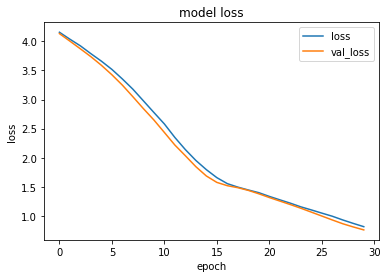

In [16]:
plt.plot(history_im3.history['loss'])
plt.plot(history_im3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'], loc='upper right')
plt.show()

In [17]:
im3.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               400       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 11        
Total params: 1,421
Trainable params: 1,421
Non-trainable params: 0
_________________________________________________________________
